# Natural Language Processing - Individual Assignment (COMM061)

#### Student Name: Harveen Kaur 
#### Student ID: 6455077

### Index

1. Data Preparation and Data Cleaning
2. Data Visualization
3. Experimental Setup 1
   3.1 Data Preprocessing - Stemming
   3.2 Data Preprocessing - Lemmatization
   3.3 Modeling
       3.3.1 Logistic Regression - Stemming
       3.3.2 Logistic Regression - Lemmatization
       3.3.3. Naive Bayes - Stemming
       3.3.4. Naive Bayes - Lemmatization
4. Experimental Setup 2 
   4.1 Pre-Processing Methods (Tokenization, Padding, Train/Test Split)
   4.2 Modeling
       4.2.1 Deep Neural Network
       4.2.2 CNN - Stemming
       4.2.3 Confusion Matrix for each genre
       4.2.4 CNN - Lemmatization
       4.3.5 CNN - GloVe embeddings
5. Experimental Setup 3 - Adam vs SGD optimizer
6. Experimental Setup 4 - Different number of epochs (CNN)
7. Conclusion

# 1. Data Preparation and Data Cleaning

As a group, we have decided to work on the netflix dataset derived from https://www.kaggle.com/shivamb/netflix-shows.

Aim: The aim of the assignment is to build a multilabel text classification model that predicts the genre of the movie based on its description. We have used the "listed_in" column from the netflix dataset as our target variable and the "description" column as our independent variable.

In [36]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#loading the dataset
netflix_data = pd.read_csv("/users/harveenkaur/Downloads/netflix_titles.csv")
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [38]:
#Separating the "listed_in" categories  via comma and using them as our target variable
netflix_data['listed_in'] = netflix_data['listed_in'].apply(lambda x: x.split(', '))

In [39]:
#Creating a dataframe for our target variables to perform analysis on them
genres = ['genre_1', 'genre_2', 'genre_3']
gen = pd.DataFrame(netflix_data['listed_in'].to_list(), columns = genres)
gen.head()

,genre_1,genre_2,genre_3
0,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,Dramas,International Movies,None
2,Horror Movies,International Movies,None
3,Action & Adventure,Independent Movies,Sci-Fi & Fantasy
4,Dramas,None,None


In [40]:
#Using only the unique categories from each column
category_1_genres = gen.genre_1.unique()
category_2_genres = gen.genre_2.unique()
category_3_genres = gen.genre_3.unique()

In [41]:
#Combining all the genres and exploring them
genres = np.concatenate([category_1_genres, category_2_genres, category_3_genres])
genres = list(dict.fromkeys(genres))
genres = [x for x in genres if x is not None]
genres

['International TV Shows',
 'Dramas',
 'Horror Movies',
 'Action & Adventure',
 'Crime TV Shows',
 'Documentaries',
 'Independent Movies',
 'Comedies',
 'Sports Movies',
 'Anime Series',
 'Reality TV',
 'TV Comedies',
 'Docuseries',
 'Movies',
 'British TV Shows',
 'International Movies',
 'Sci-Fi & Fantasy',
 "Kids' TV",
 'Children & Family Movies',
 'TV Shows',
 'Classic Movies',
 'Thrillers',
 'Stand-Up Comedy & Talk Shows',
 'Stand-Up Comedy',
 'Anime Features',
 'Music & Musicals',
 'TV Dramas',
 'TV Horror',
 'TV Action & Adventure',
 'Classic & Cult TV',
 'Romantic TV Shows',
 'Cult Movies',
 'TV Sci-Fi & Fantasy',
 'Romantic Movies',
 'Spanish-Language TV Shows',
 'LGBTQ Movies',
 'Science & Nature TV',
 'Korean TV Shows',
 'Faith & Spirituality',
 'Teen TV Shows',
 'TV Mysteries',
 'TV Thrillers']

In [42]:
#Forming a dataframe for the target variables using values 1 and 0
df = pd.concat([gen, pd.DataFrame(columns = list(genres))])
df.head()

,genre_1,genre_2,genre_3,International TV Shows,Dramas,Horror Movies,Action & Adventure,Crime TV Shows,Documentaries,Independent Movies,...,TV Sci-Fi & Fantasy,Romantic Movies,Spanish-Language TV Shows,LGBTQ Movies,Science & Nature TV,Korean TV Shows,Faith & Spirituality,Teen TV Shows,TV Mysteries,TV Thrillers
0,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dramas,International Movies,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Horror Movies,International Movies,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Action & Adventure,Independent Movies,Sci-Fi & Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dramas,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Relacing NaN values with 0 
df.fillna(0, inplace = True)
df.head()

,genre_1,genre_2,genre_3,International TV Shows,Dramas,Horror Movies,Action & Adventure,Crime TV Shows,Documentaries,Independent Movies,...,TV Sci-Fi & Fantasy,Romantic Movies,Spanish-Language TV Shows,LGBTQ Movies,Science & Nature TV,Korean TV Shows,Faith & Spirituality,Teen TV Shows,TV Mysteries,TV Thrillers
0,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Dramas,International Movies,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Horror Movies,International Movies,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Action & Adventure,Independent Movies,Sci-Fi & Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dramas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#the following code replaces the 0s with 1s for categories present in that row
row = 0
for genre in df['genre_1']:
    if genre != 0:
        df.loc[row, genre] = 1
    row = row + 1
    
row = 0
for genre in df['genre_2']:
    if genre != 0:
        df.loc[row, genre] = 1
    row = row + 1
    
row = 0
for genre in df['genre_3']:
    if genre != 0:
        df.loc[row, genre] = 1
    row = row + 1
    
df.head()

,genre_1,genre_2,genre_3,International TV Shows,Dramas,Horror Movies,Action & Adventure,Crime TV Shows,Documentaries,Independent Movies,...,TV Sci-Fi & Fantasy,Romantic Movies,Spanish-Language TV Shows,LGBTQ Movies,Science & Nature TV,Korean TV Shows,Faith & Spirituality,Teen TV Shows,TV Mysteries,TV Thrillers
0,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Dramas,International Movies,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Horror Movies,International Movies,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Action & Adventure,Independent Movies,Sci-Fi & Fantasy,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Dramas,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
#Concatenating the "description" column from the original netflix data with the target variables dataframe creates the following table for easy analysis
data = pd.concat([netflix_data['description'], df.loc[:,"International TV Shows":]],axis=1)
data

,description,International TV Shows,Dramas,Horror Movies,Action & Adventure,Crime TV Shows,Documentaries,Independent Movies,Comedies,Sports Movies,...,TV Sci-Fi & Fantasy,Romantic Movies,Spanish-Language TV Shows,LGBTQ Movies,Science & Nature TV,Korean TV Shows,Faith & Spirituality,Teen TV Shows,TV Mysteries,TV Thrillers
0,In a future where the elite inhabit an island ...,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,After a devastating earthquake hits Mexico Cit...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"When an army recruit is found dead, his fellow...",0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"In a postapocalyptic world, rag-doll robots hi...",0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A brilliant group of students become card-coun...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,When Lebanon's Civil War deprives Zozo of his ...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7783,A scrappy but poor boy worms his way into a ty...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7784,"In this documentary, South African rapper Nast...",0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7785,Dessert wizard Adriano Zumbo looks for the nex...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#To simplify our analysis and clean the data, we combine similar categories into one column as follows:
#This code was adapted from Sandnyit (my groupmate) for the purpose of theis project.

data['Comedy']=data['Comedies']+data['Stand-Up Comedy']+data['Stand-Up Comedy & Talk Shows']+data['TV Comedies']
data.drop(['Comedies','Stand-Up Comedy','Stand-Up Comedy & Talk Shows','TV Comedies'], axis = 1, inplace=True)

data['Drama']=data['Dramas']+data['TV Dramas']
data.drop(['Dramas','TV Dramas'],axis=1, inplace=True)

data['International TV']=data['International TV Shows']+data['Korean TV Shows']+data['Spanish-Language TV Shows']
data.drop(['International TV Shows','Korean TV Shows','Spanish-Language TV Shows'],axis=1, inplace=True)

data['Horror']=data['Horror Movies']+data['TV Horror']
data.drop(['Horror Movies','TV Horror'],axis=1, inplace=True)

data['Action and Adventure']=data['Action & Adventure']+data['TV Action & Adventure']
data.drop(['Action & Adventure','TV Action & Adventure'],axis=1, inplace=True)

data['Cult and Classic']=data['Classic Movies']+data['Classic & Cult TV']+data['Cult Movies']
data.drop(['Classic Movies','Classic & Cult TV','Cult Movies'],axis=1, inplace=True)

data['Documentary']=data['Documentaries']+data['Docuseries']+data['Science & Nature TV']+data['Faith & Spirituality']
data.drop(['Documentaries','Docuseries','Science & Nature TV','Faith & Spirituality'],axis=1, inplace=True)

data['Thriller']=data['Thrillers']+data['TV Thrillers']+data['Crime TV Shows']+data['TV Mysteries']
data.drop(['Thrillers','TV Thrillers','Crime TV Shows','TV Mysteries'],axis=1, inplace=True)

data['TV Show']=data['TV Shows']+data['British TV Shows']+data['Reality TV']
data.drop(['TV Shows','British TV Shows','Reality TV'],axis=1, inplace=True)

data['Romantic']=data['Romantic Movies']+data['Romantic TV Shows']+data['Teen TV Shows']
data.drop(['Romantic Movies','Romantic TV Shows','Teen TV Shows'],axis=1,inplace=True)

data['Kids and Family']=data['Children & Family Movies']+data['Sci-Fi & Fantasy']+data["Kids' TV"]+data['Anime Series']+data['Anime Features']+data['TV Sci-Fi & Fantasy']
data.drop(['Children & Family Movies','Sci-Fi & Fantasy',"Kids' TV",'Anime Series','Anime Features','TV Sci-Fi & Fantasy'],axis=1,inplace=True)

data['Movie']=data['Independent Movies']+data['Movies']+data['LGBTQ Movies']+data['Sports Movies']
data.drop(['Independent Movies','Movies','LGBTQ Movies','Sports Movies'],inplace=True,axis=1)

In [47]:
#replacing higher counts with 1 in the dataframe
data.replace([2,3],1,inplace=True)

In [48]:
#we create another dataframe that represents our target variables and the respective count for them
count_data = pd.DataFrame()
count_data['category'] = data.columns[1:]
count_data['count'] = data.iloc[:,1:].sum().values
count_data.sort_values(['count'], inplace=True, ascending=False)
count_data.reset_index(inplace=True, drop=True)
count_data.head(15)

,category,count
0,Drama,2810
1,International Movies,2437
2,Comedy,2344
3,Kids and Family,1372
4,International TV,1239
5,Documentary,1188
6,Thriller,1018
7,Movie,988
8,Romantic,916
9,Action and Adventure,871


In [49]:
main_categories = pd.DataFrame()
main_categories = count_data[count_data['count']>200]
categories = main_categories['category'].values
categories = np.append(categories,'Others')
not_category = []
data['Others'] = 0

for i in data.columns[1:]:
    if i not in categories:
        data['Others'][data[i] == 1] = 1
        not_category.append(i)

data.drop(not_category, axis=1, inplace=True)

<ipython-input-49-411bda38fdb2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Others'][data[i] == 1] = 1


# 2. Data Visualisation

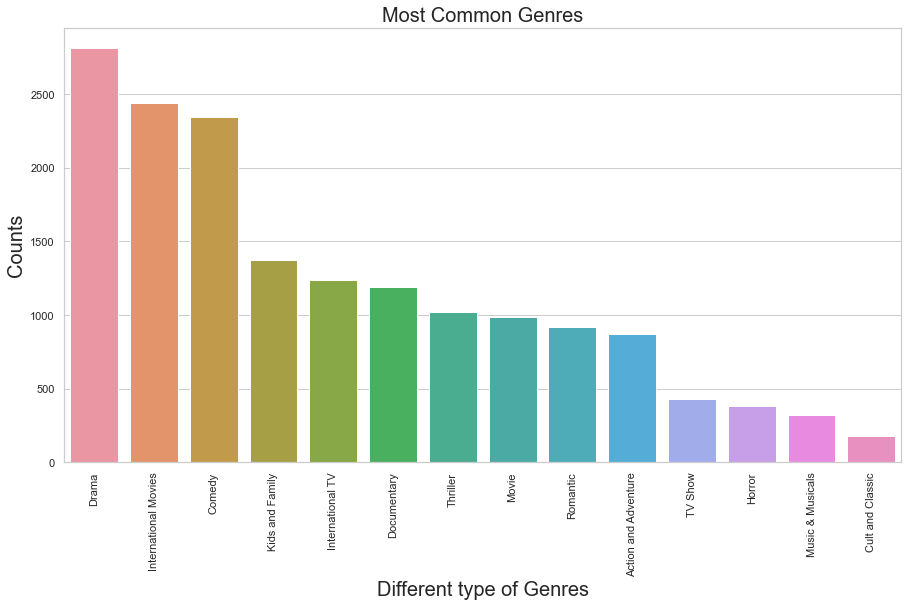

In [51]:
#Plotting the most common genres 

plt.figure(figsize=(15,8))

sns.barplot(count_data['category'], count_data['count'])
plt.title('Most Common Genres', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.xlabel('Different type of Genres', fontsize=20)
plt.xticks(rotation='90')

plt.show()

Figure 1. depicts the movie genre categories across the x axis and their counts on the y axis. There are thus 14 classes that need to be predicted. 

In [52]:
#rowSums = data.iloc[:,1:].sum(axis=1).value_counts()
#multiLabel_counts = rowSums.value_counts()

In [53]:
data.head()

,description,International Movies,Music & Musicals,Comedy,Drama,International TV,Horror,Action and Adventure,Documentary,Thriller,TV Show,Romantic,Kids and Family,Movie,Others
0,In a future where the elite inhabit an island ...,0,0,0,1,1,0,0,0,0,0,0,1,0,0
1,After a devastating earthquake hits Mexico Cit...,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"When an army recruit is found dead, his fellow...",1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,"In a postapocalyptic world, rag-doll robots hi...",0,0,0,0,0,0,1,0,0,0,0,1,1,0
4,A brilliant group of students become card-coun...,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [54]:
data.iloc[:,1:].sum(axis=1).value_counts()

2    3047
3    2829
1    1911
dtype: int64

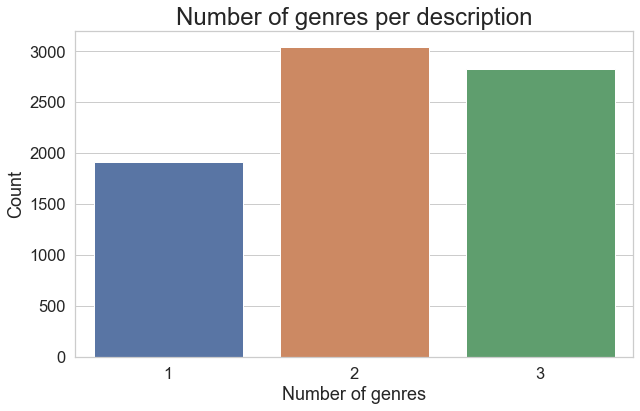

In [56]:
#Plotting the genres count per category
sns.set(font_scale = 1.5)
sns.set_style('whitegrid') 
plt.figure(figsize=(10,6))

sns.barplot(data.iloc[:,1:].sum(axis=1).value_counts().index, data.iloc[:,1:].sum(axis=1).value_counts().values)
plt.title("Number of genres per description", fontsize=24)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Number of genres', fontsize=18)

plt.show()

Figure 2. The histogram depicts the number of genres/categories per description since it is a multilabel text classification problem. Most descriptions are classified into atleast 2 genres followed by 3 genres and least likely just 1 genre. Therefore, we need a model to solve a multi-label text classification problem.

In [57]:
bar_plot = pd.DataFrame()
bar_plot['category'] = data.columns[1:]
bar_plot['count'] = data.iloc[:,1:].sum().values
bar_plot.sort_values(['count'], inplace=True, ascending=False)
bar_plot.reset_index(inplace=True, drop=True)
bar_plot.head()

boxplot = data.description.copy()
boxplot['len'] = data.description.apply(lambda x: len(x))

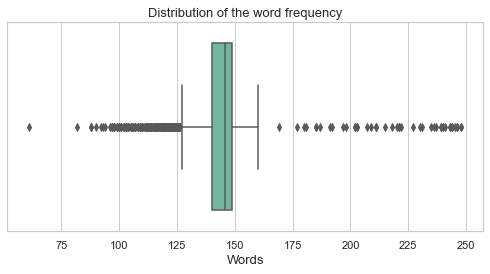

In [58]:
sns.set(style="whitegrid",rc={"font.size":13,"axes.labelsize":13})

plt.figure(figsize=(7,4))

ax = sns.boxplot(x='len', data=boxplot, orient="h", palette="Set2")
plt.ylabel('')
plt.xlabel('Number of words')
plt.title("Distribution of the word frequency", fontsize=13)
plt.tight_layout(h_pad=3)

Figure 3. The bar plot depicts that each description usually consists of a mean of approximately 148 words with a minimum of 126 words and a maximum of 160 words. There are considerable number of outliers on each side: with 50 words one side and 244 words on the other side.

# 3. Experimental Setup 1

## 3.1 Data Pre-Processing Part 1 - Stemming

We perform stemming as part of our Experimental Setup 1 - Data Pre-Processing methods.

In [820]:
#importing the required libraries
#importing regular expressions
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [504]:
#code for stemming and normalisation the data
#storing the pre-processed data in corpus

ps = PorterStemmer()

corpus= []
for i in range(0, len(data)):
    stem_tokens = re.sub('[^a-zA-Z]', ' ', data.description[i])
    stem_tokens = stem_tokens.lower()
    stem_tokens = stem_tokens.split()
    
    stem_tokens = [ps.stem(word) for word in stem_tokens if not word in stopwords.words('english')]
    stem_tokens = ' '.join(stem_tokens)

corpus.append(stem_tokens)

In [821]:
#pre-processed data
corpus

['futur elit inhabit island paradis far crowd slum get one chanc join save squalor',
 'devast earthquak hit mexico citi trap survivor walk life wait rescu tri desper stay aliv',
 'armi recruit found dead fellow soldier forc confront terrifi secret haunt jungl island train camp',
 'postapocalypt world rag doll robot hide fear danger machin extermin brave newcom join group',
 'brilliant group student becom card count expert intent swindl million la vega casino play blackjack',
 'genet professor experi treatment comatos sister blend medic shaman cure unlock shock side effect',
 'aw accid coupl admit grisli hospit separ must find escap death find',
 'one high school student attack dedic teacher trevor garfield grow weari gang warfar new york citi school system move california teach think must less hostil environ',
 'doctor goe miss psychiatrist wife treat bizarr medic condit psychic patient know much lead',
 'architect wife move castl slate becom luxuri hotel someth insid determin stop ren

### TF-IDF
There are different forms to represent the text in a model. Here we will be using a simple but very powerful technique called TF-IDF which stands for Term Frequency – Inverse Document Frequency. It is used to represent the importance of each word inside a text corpus.

In [976]:
#feature extraction and vectorisation
from sklearn .feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()

#Here X is defined for training purposes
X_stemming  = cv.fit_transform(corpus).toarray()
X_stemming

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.33291699,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [975]:
#defining y for training the data
y_stemming = data[['International Movies', 'Music & Musicals', 'Comedy',
       'Drama', 'International TV', 'Horror', 'Action and Adventure',
       'Documentary', 'Thriller', 'TV Show', 'Romantic', 'Kids and Family',
       'Movie', 'Others']]
y_stemming.shape
X_stemming.shape


(7787, 12763)

### Train Test Split

Performing the train test split. Here we split the data between train and test data using 80% of the data to train and keeping the rest to test the final model.

In [528]:
#train test split for training our data
from sklearn.model_selection import train_test_split
X_train_stemming, X_test_stemming, y_train_stemming, y_test_stemming = train_test_split(X_stemming, y_stemming, test_size=0.2, random_state=0)

## 3.2 Data Pre-Processing Part 2 - Lemmatization

As part of experimental setup 1, we perform lemmatization to see if it affects our model performance in comparison to data that was pre-processed with stemming.

In [22]:
#loading the libraries
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [23]:
wordnet = WordNetLemmatizer()

In [24]:
#code for lemmatization

import nltk 
corpus_lemma= []
for i in range(0, len(data)):
    lemma_tokens = re.sub('[^a-zA-Z]', ' ', data.description[i])
    lemma_tokens = lemma_tokens.lower()
    lemma_tokens = lemma_tokens.split()
    
    lemma_tokens = [wordnet.lemmatize(word) for word in lemma_tokens if not word in stopwords.words('english')]
    lemma_tokens = ' '.join(lemma_tokens)
    corpus_lemma.append(lemma_tokens)

In [25]:
#lemmatized data stored in corpus_lemma
corpus_lemma

['future elite inhabit island paradise far crowded slum get one chance join saved squalor',
 'devastating earthquake hit mexico city trapped survivor walk life wait rescued trying desperately stay alive',
 'army recruit found dead fellow soldier forced confront terrifying secret haunting jungle island training camp',
 'postapocalyptic world rag doll robot hide fear dangerous machine exterminate brave newcomer join group',
 'brilliant group student become card counting expert intent swindling million la vega casino playing blackjack',
 'genetics professor experiment treatment comatose sister blend medical shamanic cure unlocks shocking side effect',
 'awful accident couple admitted grisly hospital separated must find escape death find',
 'one high school student attack dedicated teacher trevor garfield grows weary gang warfare new york city school system move california teach thinking must le hostile environment',
 'doctor go missing psychiatrist wife treat bizarre medical condition psy

In [26]:
# performing feature extraction
# defining X (X_lemma) for training
from sklearn .feature_extraction.text import TfidfVectorizer
cv_lemma = TfidfVectorizer()
X_lemma  = cv_lemma.fit_transform(corpus_lemma).toarray()

In [27]:
#defining y_lemma, our target variables for training
print(data.columns)
y_lemma = data[['International Movies', 'Music & Musicals', 'Comedy',
       'Drama', 'International TV', 'Horror', 'Action and Adventure',
       'Documentary', 'Thriller', 'TV Show', 'Romantic', 'Kids and Family',
       'Movie', 'Others']]

Index(['description', 'International Movies', 'Music & Musicals', 'Comedy',
       'Drama', 'International TV', 'Horror', 'Action and Adventure',
       'Documentary', 'Thriller', 'TV Show', 'Romantic', 'Kids and Family',
       'Movie', 'Others'],
      dtype='object')


In [28]:
print(X_lemma.shape)
print(y_lemma.shape)

(7787, 15823)
(7787, 14)


### Train Test Split

Performing train test split for the lemmatized dataset. 

In [29]:
from sklearn.model_selection import train_test_split
X_train_lemma, X_test_lemma, y_train_lemma, y_test_lemma = train_test_split(X_lemma, y_lemma, test_size=0.2, random_state=0)

## 3.3 Modeling

### 3.3.1 Logistic Regression (Data Pre-Processing 1 - Stemming)

The logistic model (or logit model) is used to model the probability of a certain class or event. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

In [529]:
#importing the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

#defining the model
LR_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1))])
accuracy = 0
for category in y:
    print('**Processing {} titles...**'.format(category))
    
    # Training logistic regression model on train data
    LR_pipeline.fit(X_train_stemming, y_train_stemming[category])
    
    # calculating test accuracy
    prediction = LR_pipeline.predict(X_test_stemming)
    accuracy = accuracy + accuracy_score(y_test_stemming[category], prediction)
    print('AUC ROC score is {}'.format(roc_auc_score(y_test_stemming[category],prediction)))
    print('Test accuracy is {}'.format(accuracy_score(y_test_stemming[category], prediction)))
    print("\n")

**Processing International Movies titles...**
AUC ROC score is 0.580423045379989
Test accuracy is 0.714377406931964


**Processing Music & Musicals titles...**
AUC ROC score is 0.5
Test accuracy is 0.9563543003851092


**Processing Comedy titles...**
AUC ROC score is 0.6350803652686299
Test accuracy is 0.7625160462130937


**Processing Drama titles...**
AUC ROC score is 0.6578091291990548
Test accuracy is 0.7265725288831836


**Processing International TV titles...**
AUC ROC score is 0.5057034220532319
Test accuracy is 0.8331193838254172


**Processing Horror titles...**
AUC ROC score is 0.5064935064935064
Test accuracy is 0.9512195121951219


**Processing Action and Adventure titles...**
AUC ROC score is 0.5143418501592577
Test accuracy is 0.8953786906290115


**Processing Documentary titles...**
AUC ROC score is 0.6454260651629072
Test accuracy is 0.8940949935815148


**Processing Thriller titles...**
AUC ROC score is 0.5353164769700025
Test accuracy is 0.8716302952503209


**Process

In [531]:
print('Test averaged AUC ROC is {}'.format(accuracy/len(data.columns[1:])))

Test averaged AUC ROC is 0.8680542820465798


### 3.3.2 Logistic Regression ( Data Pre-Processing 2 - Lemmatization)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier


LR_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1))])
accuracy_LR_stem = 0
for category in y_lemma:
    print('**Processing {} titles...**'.format(category))
    
    # Training logistic regression model on train data
    LR_pipeline.fit(X_train_lemma, y_train_lemma[category])
    
    # calculating test accuracy
    prediction_lemma = LR_pipeline.predict(X_test_lemma)
    accuracy_LR_stem = accuracy_LR_stem + accuracy_score(y_test_lemma[category], prediction_lemma)
    print('AUC ROC score is {}'.format(roc_auc_score(y_test_lemma[category],prediction_lemma)))
    print('Test accuracy is {}'.format(accuracy_score(y_test_lemma[category], prediction_lemma)))
    print("\n")

print('Test averaged AUC ROC is {}'.format(accuracy_LR_stem/len(data.columns[1:])))

**Processing International Movies titles...**
AUC ROC score is 0.582915679484843
Test accuracy is 0.7214377406931964


**Processing Music & Musicals titles...**
AUC ROC score is 0.5
Test accuracy is 0.9563543003851092


**Processing Comedy titles...**
AUC ROC score is 0.6273870490058461
Test accuracy is 0.7605905006418485


**Processing Drama titles...**
AUC ROC score is 0.648820326678766
Test accuracy is 0.7207958921694481


**Processing International TV titles...**
AUC ROC score is 0.5057034220532319
Test accuracy is 0.8331193838254172


**Processing Horror titles...**
AUC ROC score is 0.5064935064935064
Test accuracy is 0.9512195121951219


**Processing Action and Adventure titles...**
AUC ROC score is 0.523377994737571
Test accuracy is 0.8973042362002568


**Processing Documentary titles...**
AUC ROC score is 0.6374060150375941
Test accuracy is 0.8928112965340179


**Processing Thriller titles...**
AUC ROC score is 0.5312257515456434
Test accuracy is 0.8716302952503209


**Processi

In [31]:
print('Test averaged AUC ROC is {}'.format(accuracy_LR_stem/len(data.columns[1:])))

Test averaged AUC ROC is 0.8676875114615806


### 3.3.3 Naive Bayes Algorithm - ( Data Pre-Processing 1 - Stemming )

In statistics, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features.

In [826]:
from sklearn.naive_bayes import MultinomialNB

NB_pipeline = Pipeline([('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None)))])
accuracy_NB_stem = 0
for category in data.columns[1:]:
    print('**Processing {} titles...**'.format(category))
    
    # Training logistic regression model on train data
    NB_pipeline.fit(X_train_stemming, y_train_stemming[category])
    
    # calculating test accuracy
    prediction_nb = NB_pipeline.predict(X_test_stemming)
    accuracy_NB_stem = accuracy_NB_stem + accuracy_score(y_test_stemming[category], prediction_nb)
    print('AUC ROC is {}'.format(roc_auc_score(y_test_stemming[category],prediction_nb)))
    print('Test accuracy is {}'.format(accuracy_score(y_test_stemming[category], prediction_nb)))
    print('f1 is {}'.format(f1_score(y_test_stemming[category], prediction_nb)))
    print("\n")

print('Test averaged AUC ROC is {}'.format(accuracy_NB_stem/len(data.columns[1:])))

**Processing International Movies titles...**
AUC ROC is 0.5205599599052306
Test accuracy is 0.6906290115532734
f1 is 0.09737827715355807


**Processing Music & Musicals titles...**
AUC ROC is 0.5
Test accuracy is 0.9563543003851092
f1 is 0.0


**Processing Comedy titles...**
AUC ROC is 0.5696100510573971
Test accuracy is 0.7329910141206675
f1 is 0.24637681159420285


**Processing Drama titles...**
AUC ROC is 0.6037907064342706
Test accuracy is 0.7066752246469833
f1 is 0.3782312925170068


**Processing International TV titles...**
AUC ROC is 0.5
Test accuracy is 0.831193838254172
f1 is 0.0


**Processing Horror titles...**
AUC ROC is 0.5
Test accuracy is 0.9505776636713735
f1 is 0.0


**Processing Action and Adventure titles...**
AUC ROC is 0.5
Test accuracy is 0.8934531450577664
f1 is 0.0


**Processing Documentary titles...**
AUC ROC is 0.5153508771929824
Test accuracy is 0.8581514762516046
f1 is 0.05957446808510638


**Processing Thriller titles...**
AUC ROC is 0.5
Test accuracy is 

### 3.3.4 Naive Bayes Algorithm - ( Data Pre-Processing 2 - Lemmatization)

In [829]:
from sklearn.naive_bayes import MultinomialNB

NB_pipeline = Pipeline([('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None)))])
accuracy_nb_lemma = 0
for category in data.columns[1:]:
    print('**Processing {} titles...**'.format(category))
    
    # Training logistic regression model on train data
    NB_pipeline.fit(X_train_lemma, y_train_lemma[category])
    
    # calculating test accuracy
    prediction_nb2 = NB_pipeline.predict(X_test_lemma)
    accuracy_nb_lemma = accuracy_nb_lemma + accuracy_score(y_test_lemma[category], prediction_nb2)
    print('AUC ROC is {}'.format(roc_auc_score(y_test_stemming[category],prediction_nb2)))
    print('Test accuracy is {}'.format(accuracy_score(y_test_lemma[category], prediction_nb2)))
    print('f1 is {}'.format(f1_score(y_test_lemma[category], prediction_nb2)))
    print("\n")

print('Test averaged AUC ROC is {}'.format(accuracy_nb_lemma/len(data.columns[1:])))

**Processing International Movies titles...**
AUC ROC is 0.5193525605977767
Test accuracy is 0.6919127086007703
f1 is 0.08396946564885498


**Processing Music & Musicals titles...**
AUC ROC is 0.5
Test accuracy is 0.9563543003851092
f1 is 0.0


**Processing Comedy titles...**
AUC ROC is 0.5633859846673557
Test accuracy is 0.7291399229781772
f1 is 0.22710622710622708


**Processing Drama titles...**
AUC ROC is 0.5914974488922371
Test accuracy is 0.6976893453145058
f1 is 0.34854771784232363


**Processing International TV titles...**
AUC ROC is 0.5
Test accuracy is 0.831193838254172
f1 is 0.0


**Processing Horror titles...**
AUC ROC is 0.5
Test accuracy is 0.9505776636713735
f1 is 0.0


**Processing Action and Adventure titles...**
AUC ROC is 0.5
Test accuracy is 0.8934531450577664
f1 is 0.0


**Processing Documentary titles...**
AUC ROC is 0.5131578947368421
Test accuracy is 0.8575096277278562
f1 is 0.05128205128205127


**Processing Thriller titles...**
AUC ROC is 0.5
Test accuracy is

In [35]:
columns_stem_lemma = []
stem_lemma_results = pd.DataFrame(columns = columns_stem_lemma)

stem_lemma_results.loc[1, 'LR Stemming'] = (accuracy/len(data.columns[1:]))
stem_lemma_results.loc[1, 'LR Lemmatized'] = accuracy_LR_stem/len(data.columns[1:])
stem_lemma_results.loc[1, 'NB Stemming'] = (accuracy_NB_stem/len(data.columns[1:]))
stem_lemma_results.loc[1, 'NB Lemmatized'] = accuracy_nb_lemma/len(data.columns[1:])

stem_lemma_results

,LR Stemming,LR Lemmatized,NB Stemming,NB Lemmatized
1,0.868054,0.867688,0.856959,0.855905


#### Conclusion for Experimental Setup 1
In Experimental Setup 1 we performed two different types of data preprocessing: stemming and lemmatization. We evaluated both of the techniques on two types of statistical models: Logistic Regression and Naive Bayes model. It is clearly evident that the differences in the accuracies of the model when tested on different data pre processing techniques i.e. stemming and lemmatization did not significantly affect model performance. Only negligible preference was observed for data with stemming preprocessing.
In terms of performance of each model, we received reasonably well accuracies over 85% in each case. However, the AUC-ROC curve for the entire experiment revolve around values of 0.5 for most of the classes which indicates poor modeling. Therefore, using statistical methods for our problem does not solve the problem of classification.

# 4. Experimental Setup 2 

As part of Experimental Setup 2, we evaluated two neural networks models (DNN and CNN) for the netflix training dataset. There are different types of neural networks but they always consist of the same components: neurons, synapses, weights, biases, and functions.Data preprocessing steps such as tokenisation, padding, sequencing were performed to make the dataset ready for training.

## 4.1 Pre-Processing Methods (Tokenization, Padding, Train/Test Split)

In [774]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(corpus) #tokenization
sequences = tokenizer.texts_to_sequences(corpus) 
x = pad_sequences(sequences, maxlen=200) #sequencing
x #x label ready for training

array([[   0,    0,    0, ...,  226,   98,   47],
       [   0,    0,    0, ...,  354,  435, 1231],
       [   0,    0,    0, ...,  316,  179,  592],
       ...,
       [   0,    0,    0, ..., 1016, 1066,  142],
       [   0,    0,    0, ..., 1487,  398,  640],
       [   0,    0,    0, ...,  310,   93, 1066]], dtype=int32)

In [775]:
list_class = ['International Movies', 'Music & Musicals', 'Comedy',
       'Drama', 'International TV', 'Horror', 'Action and Adventure',
       'Documentary', 'Thriller', 'TV Show', 'Romantic', 'Kids and Family',
       'Movie', 'Others']
y = data[list_class].values
print(y) #target variable ready for training

[[0 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [776]:
#Performing train test split for training with our x and y
from sklearn.model_selection import train_test_split
seeds = [1, 43, 678, 90, 135]
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=seeds[4])

In [680]:
num_classes = y_train.shape[1] #number of classes
max_words = len(tokenizer.word_index) + 1 #maximum number of words
maxlen = 200 #max length of sentences

In [681]:
#determining the weight of each class
count_data['class_weight'] = len(count_data) / count_data['count']
class_weight = {}
for index, label in enumerate(categories):
    class_weight[index] = count_data[count_data['category'] == categories]['class_weight'].values[0]
    
count_data.head()

,category,count,class_weight
0,Drama,2810,0.004982
1,International Movies,2437,0.005745
2,Comedy,2344,0.005973
3,Kids and Family,1372,0.010204
4,International TV,1239,0.011299


In [682]:
#defining the classification evaluation metrics
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [897]:
#creating a table to input the accuracies of each model
columns = ['DNN model - Stemming','CNN model - Stemming', 'CNN model - Lemmatization', 'CNN model - GloVe Embeddings']
preprocessing_results = pd.DataFrame(columns = columns)
preprocessing_results

,DNN model - Stemming,CNN model - Stemming,CNN model - Lemmatization,CNN model - GloVe Embeddings


#### We will use our pre-processed data to train two models: DNN and CNN. We analyse performance on these two model with the same optimizer - Adam, epochs - 30 and batch size - 32.

## 4.2 Modeling

### 4.2.1 Deep Neural Network

A DNN is a collection of neurons organized in a sequence of multiple layers, where neurons receive as input the neuron activations from the previous layer, and perform a simple computation (e.g. a weighted sum of the input followed by a nonlinear activation). A deep neural network is a neural network with a certain level of complexity, a neural network with more than two layers. 

Training the DNN model on our pre-processed data to analyse netflix dataset movie genres.

In [585]:
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import tensorflow as tf

dnn_model = Sequential()
dnn_model.add(Embedding(max_words, 20, input_length=maxlen))
#model.add(Dropout(0.2))
dnn_model.add(GlobalMaxPool1D())
dnn_model.add(Dense(num_classes, activation='sigmoid'))

dnn_model.compile(optimizer=Adam(0.015), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])
callbacks = [
    ReduceLROnPlateau(),
    #EarlyStopping(patience=10),
    ModelCheckpoint(filepath='model-simple.h5', save_best_only=True)
]


history = dnn_model.fit(X_train, y_train,
                    class_weight=class_weight,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.3,
                    callbacks=callbacks)

Epoch 1/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0024 - auc_27: 0.5929 - val_loss: 0.3710 - val_auc_27: 0.7591
Epoch 2/30
120/120 [==============================] - 0s 3ms/step - loss: 0.0017 - auc_27: 0.7898 - val_loss: 0.3459 - val_auc_27: 0.7972
Epoch 3/30
120/120 [==============================] - 0s 3ms/step - loss: 0.0015 - auc_27: 0.8495 - val_loss: 0.3457 - val_auc_27: 0.8036
Epoch 4/30
120/120 [==============================] - 0s 3ms/step - loss: 0.0013 - auc_27: 0.8896 - val_loss: 0.3543 - val_auc_27: 0.7958
Epoch 5/30
120/120 [==============================] - 0s 3ms/step - loss: 0.0012 - auc_27: 0.9166 - val_loss: 0.3702 - val_auc_27: 0.7931
Epoch 6/30
120/120 [==============================] - 0s 3ms/step - loss: 0.0010 - auc_27: 0.9361 - val_loss: 0.3897 - val_auc_27: 0.7812
Epoch 7/30
120/120 [==============================] - 0s 3ms/step - loss: 9.1746e-04 - auc_27: 0.9533 - val_loss: 0.4156 - val_auc_27: 0.7726
Epoch 8/30
120/120 [==========

In [588]:
#Testing Loss, Accuracy
dnn_model.evaluate(X_test, y_test, verbose=0)

[0.6077038645744324, 0.7445129752159119]

In [591]:
# predicting on the test model
y_pred_dnn = dnn_model.predict(X_test, verbose = 1, batch_size = 32)

74/74 [==============================] - 0s 859us/step


#### AUC-ROC Curve
ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s. 

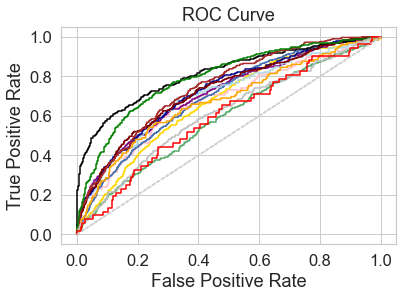

In [594]:
#We plot the ROC curves for each movie genre to see how well each category is modelled.
from sklearn.metrics import roc_curve, auc

def plot_roc(y, y_pred_dnn, colors):

    fpr, tpr, thresholds = roc_curve(y, y_pred_dnn)
  
    plt.plot(fpr, tpr, color=colors, lw = 1.5, label='ROC Curve')
    plt.plot([0, 1], [0, 1], color='lightgrey', lw = 1, linestyle='--')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
plot_roc(y_test[:, 0], y_pred_dnn[:, 0],'gold') #International movies
plot_roc(y_test[:, 1], y_pred_dnn[:, 1],"pink") #'Music & Musicals'
plot_roc(y_test[:, 2], y_pred_dnn[:, 2],"purple") #Comedy
plot_roc(y_test[:, 3], y_pred_dnn[:, 3],"b") #Drama
plot_roc(y_test[:, 4], y_pred_dnn[:, 4],"g") #International TV
plot_roc(y_test[:, 5], y_pred_dnn[:, 5],"lightblue") #Horror
plot_roc(y_test[:, 6], y_pred_dnn[:, 6],"darkblue") #Action and Adventure
plot_roc(y_test[:, 7], y_pred_dnn[:, 7],"black") #Documentary
plot_roc(y_test[:, 8], y_pred_dnn[:, 8],"maroon") #Thriller
plot_roc(y_test[:, 9], y_pred_dnn[:, 9],"orange") #TV show
plot_roc(y_test[:, 10], y_pred_dnn[:, 10],"brown") #Romantic
plot_roc(y_test[:, 11], y_pred_dnn[:, 11],"green") #Kids and Family
plot_roc(y_test[:, 12], y_pred_dnn[:, 12],"silver") #Movies
plot_roc(y_test[:, 13], y_pred_dnn[:, 13],"red") #Others

In [898]:
#inputing the average accuracy for the DNN model in the table below
preprocessing_results.loc[1,'DNN model - Stemming'] = dnn_model.evaluate(X_test, y_test)[1]
preprocessing_results

74/74 [==============================] - 0s 1ms/step - loss: 0.6077 - auc_27: 0.7445


,DNN model - Stemming,CNN model - Stemming,CNN model - Lemmatization,CNN model - GloVe Embeddings
1,0.744513,NaN,NaN,NaN


### 4.2.2 Convolutional Neural Network

Convolution neural network model processes data that has a grid pattern such as images. It is designed to learn spatial hierarchies of features automatically. CNN typically comprises three types of layers — convolution, pooling, and fully-connected layers. The convolution and pooling layers perform feature extraction, and these extracted features are mapped into the final output by the fully connected layer.

Training the CNN model on our pre-processed data to analyse netflix dataset movie genres.

In [700]:
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D

filter_length = 300

cnn_model = Sequential()
cnn_model.add(Embedding(max_words, 20, input_length=maxlen))
#model.add(Dropout(0.5))
cnn_model.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
cnn_model.add(GlobalMaxPool1D())
cnn_model.add(Dense(num_classes))
cnn_model.add(Activation('sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

callbacks = [
    ReduceLROnPlateau(),
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)
]

history = cnn_model.fit(X_train, y_train,
                    class_weight=class_weight,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.3,
                    callbacks=callbacks)

Epoch 1/30
120/120 [==============================] - 3s 16ms/step - loss: 0.0028 - auc_38: 0.5656 - val_loss: 0.3874 - val_auc_38: 0.7167
Epoch 2/30
120/120 [==============================] - 2s 16ms/step - loss: 0.0019 - auc_38: 0.7177 - val_loss: 0.3857 - val_auc_38: 0.7280
Epoch 3/30
120/120 [==============================] - 2s 17ms/step - loss: 0.0019 - auc_38: 0.7302 - val_loss: 0.3703 - val_auc_38: 0.7559
Epoch 4/30
120/120 [==============================] - 2s 18ms/step - loss: 0.0018 - auc_38: 0.7743 - val_loss: 0.3521 - val_auc_38: 0.7867
Epoch 5/30
120/120 [==============================] - 2s 17ms/step - loss: 0.0016 - auc_38: 0.8159 - val_loss: 0.3402 - val_auc_38: 0.8061
Epoch 6/30
120/120 [==============================] - 2s 17ms/step - loss: 0.0015 - auc_38: 0.8531 - val_loss: 0.3342 - val_auc_38: 0.8156
Epoch 7/30
120/120 [==============================] - 2s 17ms/step - loss: 0.0014 - auc_38: 0.8809 - val_loss: 0.3355 - val_auc_38: 0.8159
Epoch 8/30
120/120 [=======

In [414]:
y_pred.shape

(2337, 14)

In [415]:
y_test.shape

(2337, 14)

In [701]:
metrics = cnn_model.evaluate(X_test, y_test)
print("{}: {}".format(model.metrics_names[1], metrics[1]))

74/74 [==============================] - 0s 4ms/step - loss: 0.5496 - auc_38: 0.7664
auc_33: 0.7663534879684448


In [702]:
#Testing Loss, Accuracy
cnn_model.evaluate(X_test, y_test, verbose=0)

[0.5495867133140564, 0.7663534879684448]

In [703]:
# predict test values for generating AUC-ROC curve
y_pred = cnn_model.predict(X_test, verbose = 1, batch_size = 32)

74/74 [==============================] - 0s 3ms/step


In [704]:
y_pred[77]

array([1.7697433e-01, 2.3800373e-02, 1.0260940e-02, 4.0286779e-04,
       1.2182719e-04, 9.8583102e-04, 1.6592483e-06, 9.2402017e-01,
       7.3558374e-05, 4.6008825e-04, 6.8574827e-06, 1.6901871e-06,
       3.3858871e-01, 3.3075511e-03], dtype=float32)

In [705]:
y_test[77]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [419]:
y_test[:, 10]

array([0, 0, 0, ..., 0, 0, 1])

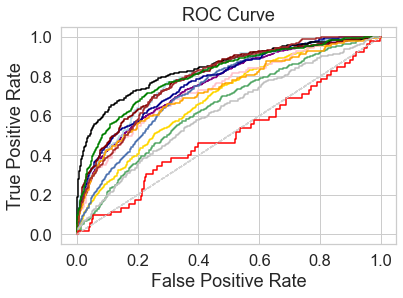

In [706]:
#Plotting the AUC-ROC curve for each label to analyze CNN model performance
from sklearn.metrics import roc_curve, auc

def plot_roc(y, y_pred, colors):

    fpr, tpr, thresholds = roc_curve(y, y_pred)
  
    plt.plot(fpr, tpr, color=colors, lw = 1.5, label='ROC Curve')
    plt.plot([0, 1], [0, 1], color='lightgrey', lw = 1, linestyle='--')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
plot_roc(y_test[:, 0], y_pred[:, 0],'gold') #International movies
plot_roc(y_test[:, 1], y_pred[:, 1],"pink") #'Music & Musicals'
plot_roc(y_test[:, 2], y_pred[:, 2],"purple") #Comedy
plot_roc(y_test[:, 3], y_pred[:, 3],"b") #Drama
plot_roc(y_test[:, 4], y_pred[:, 4],"g") #International TV
plot_roc(y_test[:, 5], y_pred[:, 5],"lightblue") #Horror
plot_roc(y_test[:, 6], y_pred[:, 6],"darkblue") #Action and Adventure
plot_roc(y_test[:, 7], y_pred[:, 7],"black") #Documentary
plot_roc(y_test[:, 8], y_pred[:, 8],"maroon") #Thriller
plot_roc(y_test[:, 9], y_pred[:, 9],"orange") #TV show
plot_roc(y_test[:, 10], y_pred[:, 10],"brown") #Romantic
plot_roc(y_test[:, 11], y_pred[:, 11],"green") #Kids and Family
plot_roc(y_test[:, 12], y_pred[:, 12],"silver") #Movies
plot_roc(y_test[:, 13], y_pred[:, 13],"red") #Others

In [899]:
#inputing the CNN model average accuracy in the table
preprocessing_results.loc[1,'CNN model - Stemming'] = cnn_model.evaluate(X_test, y_test)[1]
preprocessing_results

74/74 [==============================] - 0s 4ms/step - loss: 0.5496 - auc_38: 0.7664


,DNN model - Stemming,CNN model - Stemming,CNN model - Lemmatization,CNN model - GloVe Embeddings
1,0.744513,0.766353,NaN,NaN


In terms of performance, CNN model has performed slightly better than the DNN model in terms of accuracy for each label. On running the model multiple times, CNN always performed better even though the difference might not be extraordinarily high.

In the following section we are going to evaluate how each category has been trained by analyzing the confusion matrix for each genre (for the CNN model).

In [707]:
#defining function for confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

def cm_for_each_label(y, y_pred,threshold,ClassName):

    Y_cls = y
    Y_pred_cls = (y_pred > threshold).astype(float)
    
    accuracy = accuracy_score(Y_cls, Y_pred_cls) 
    print("Accuracy Score: {}\n".format(accuracy))
 
    print("Confusion Matrix:")
    cm = confusion_matrix(Y_cls, Y_pred_cls)
    print(cm)

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax,cmap='Blues')
   
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.suptitle(ClassName)
    print()
    print("Classification Report-")
    print(classification_report(Y_cls, Y_pred_cls, target_names=["TRUE","FALSE"]))

## 4.2.3 Confusion Matrix for each genre 

Accuracy Score: 0.6790757381258024

Confusion Matrix:
[[1269  332]
 [ 418  318]]

Classification Report-
              precision    recall  f1-score   support

        TRUE       0.75      0.79      0.77      1601
       FALSE       0.49      0.43      0.46       736

    accuracy                           0.68      2337
   macro avg       0.62      0.61      0.62      2337
weighted avg       0.67      0.68      0.67      2337



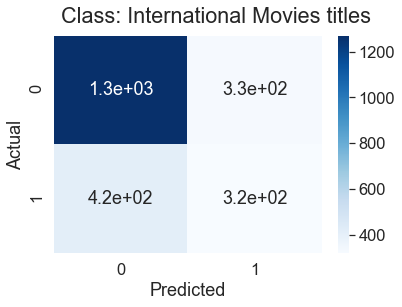

In [708]:
#Confusion Matrix for the "International Movies titles" genre.
cm_for_each_label(y_test[:, 0], y_pred[:, 0], 0.5, "Class: International Movies titles")

Accuracy Score: 0.9546427043217801

Confusion Matrix:
[[2223    6]
 [ 100    8]]

Classification Report-
              precision    recall  f1-score   support

        TRUE       0.96      1.00      0.98      2229
       FALSE       0.57      0.07      0.13       108

    accuracy                           0.95      2337
   macro avg       0.76      0.54      0.55      2337
weighted avg       0.94      0.95      0.94      2337



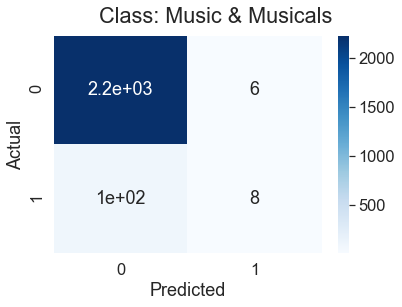

In [709]:
#Confusion Matrix for the "Music and Musicals" genre.
cm_for_each_label(y_test[:, 1], y_pred[:, 1], 0.5, "Class: Music & Musicals")

Accuracy Score: 0.7398373983739838

Confusion Matrix:
[[1361  263]
 [ 345  368]]

Classification Report-
              precision    recall  f1-score   support

        TRUE       0.80      0.84      0.82      1624
       FALSE       0.58      0.52      0.55       713

    accuracy                           0.74      2337
   macro avg       0.69      0.68      0.68      2337
weighted avg       0.73      0.74      0.74      2337



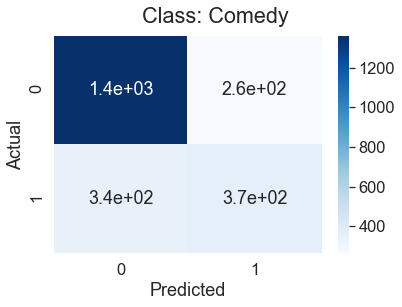

In [710]:
#Confusion Matrix for the "Comedy" genre.
cm_for_each_label(y_test[:, 2], y_pred[:, 2], 0.5, "Class: Comedy")

Accuracy Score: 0.6876337184424476

Confusion Matrix:
[[1150  356]
 [ 374  457]]

Classification Report-
              precision    recall  f1-score   support

        TRUE       0.75      0.76      0.76      1506
       FALSE       0.56      0.55      0.56       831

    accuracy                           0.69      2337
   macro avg       0.66      0.66      0.66      2337
weighted avg       0.69      0.69      0.69      2337



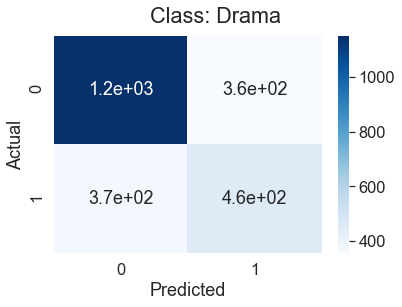

In [711]:
#Confusion Matrix for the "Drama" genre.
cm_for_each_label(y_test[:, 3], y_pred[:, 3], 0.5, "Class: Drama")

Accuracy Score: 0.7984595635430038

Confusion Matrix:
[[1821  115]
 [ 356   45]]

Classification Report-
              precision    recall  f1-score   support

        TRUE       0.84      0.94      0.89      1936
       FALSE       0.28      0.11      0.16       401

    accuracy                           0.80      2337
   macro avg       0.56      0.53      0.52      2337
weighted avg       0.74      0.80      0.76      2337



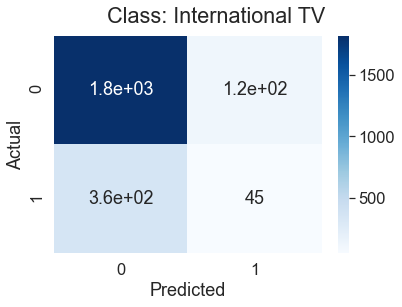

In [712]:
#Confusion Matrix for the "International TV" genre.
cm_for_each_label(y_test[:, 4], y_pred[:, 4], 0.5, "Class: International TV")

Accuracy Score: 0.9520753102267865

Confusion Matrix:
[[2210    8]
 [ 104   15]]

Classification Report-
              precision    recall  f1-score   support

        TRUE       0.96      1.00      0.98      2218
       FALSE       0.65      0.13      0.21       119

    accuracy                           0.95      2337
   macro avg       0.80      0.56      0.59      2337
weighted avg       0.94      0.95      0.94      2337



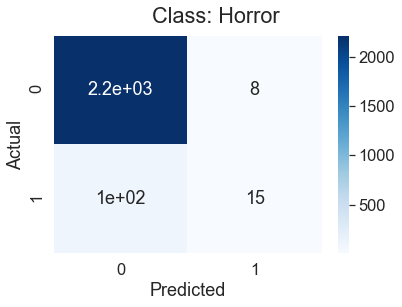

In [713]:
#Confusion Matrix for the "Horror" genre.
cm_for_each_label(y_test[:, 5], y_pred[:, 5], 0.5, "Class: Horror")

Accuracy Score: 0.8904578519469405

Confusion Matrix:
[[2017   63]
 [ 193   64]]

Classification Report-
              precision    recall  f1-score   support

        TRUE       0.91      0.97      0.94      2080
       FALSE       0.50      0.25      0.33       257

    accuracy                           0.89      2337
   macro avg       0.71      0.61      0.64      2337
weighted avg       0.87      0.89      0.87      2337



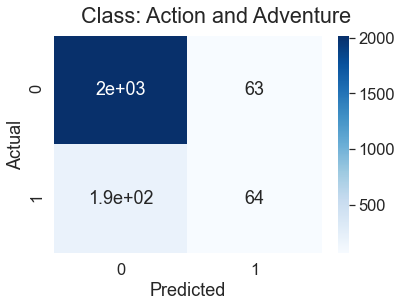

In [714]:
#Confusion Matrix for the "Action and Adventure" genre.
cm_for_each_label(y_test[:, 6], y_pred[:, 6], 0.5, "Class: Action and Adventure")

Accuracy Score: 0.8921694480102695

Confusion Matrix:
[[1915   77]
 [ 175  170]]

Classification Report-
              precision    recall  f1-score   support

        TRUE       0.92      0.96      0.94      1992
       FALSE       0.69      0.49      0.57       345

    accuracy                           0.89      2337
   macro avg       0.80      0.73      0.76      2337
weighted avg       0.88      0.89      0.88      2337



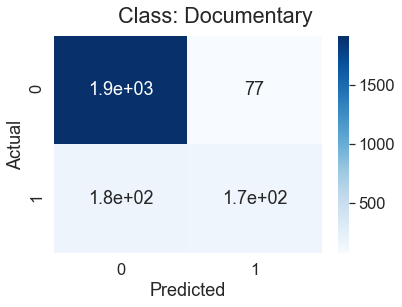

In [715]:
#Confusion Matrix for the "Documentary" genre.
cm_for_each_label(y_test[:, 7], y_pred[:, 7], 0.5, "Class: Documentary")

Accuracy Score: 0.8690629011553274

Confusion Matrix:
[[1930  113]
 [ 193  101]]

Classification Report-
              precision    recall  f1-score   support

        TRUE       0.91      0.94      0.93      2043
       FALSE       0.47      0.34      0.40       294

    accuracy                           0.87      2337
   macro avg       0.69      0.64      0.66      2337
weighted avg       0.85      0.87      0.86      2337



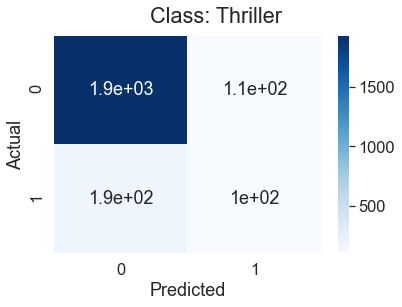

In [716]:
#Confusion Matrix for the "Thriller" genre.
cm_for_each_label(y_test[:, 8], y_pred[:, 8], 0.5, "Class: Thriller")

Accuracy Score: 0.9409499358151476

Confusion Matrix:
[[2190   18]
 [ 120    9]]

Classification Report-
              precision    recall  f1-score   support

        TRUE       0.95      0.99      0.97      2208
       FALSE       0.33      0.07      0.12       129

    accuracy                           0.94      2337
   macro avg       0.64      0.53      0.54      2337
weighted avg       0.91      0.94      0.92      2337



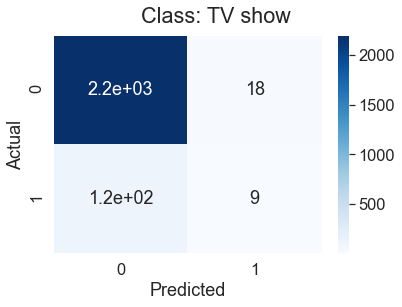

In [717]:
#Confusion Matrix for the "TV show" genre.
cm_for_each_label(y_test[:, 9], y_pred[:, 9], 0.5, "Class: TV show")

Accuracy Score: 0.8737697903294822

Confusion Matrix:
[[1966   82]
 [ 213   76]]

Classification Report-
              precision    recall  f1-score   support

        TRUE       0.90      0.96      0.93      2048
       FALSE       0.48      0.26      0.34       289

    accuracy                           0.87      2337
   macro avg       0.69      0.61      0.64      2337
weighted avg       0.85      0.87      0.86      2337



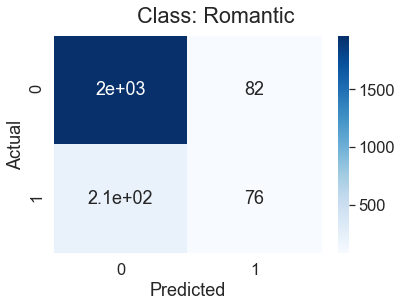

In [718]:
#Confusion Matrix for the "Romantic" genre.
cm_for_each_label(y_test[:, 10], y_pred[:, 10], 0.5, "Class: Romantic")

Accuracy Score: 0.8446726572528883

Confusion Matrix:
[[1787  139]
 [ 224  187]]

Classification Report-
              precision    recall  f1-score   support

        TRUE       0.89      0.93      0.91      1926
       FALSE       0.57      0.45      0.51       411

    accuracy                           0.84      2337
   macro avg       0.73      0.69      0.71      2337
weighted avg       0.83      0.84      0.84      2337



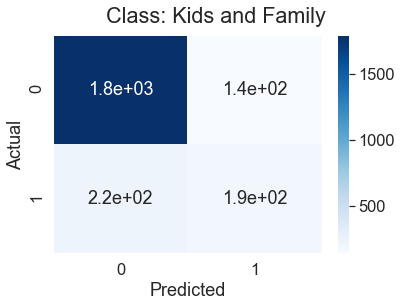

In [719]:
#Confusion Matrix for the "Kids and Family" genre.
cm_for_each_label(y_test[:, 11], y_pred[:, 11], 0.5, "Class: Kids and Family")

Accuracy Score: 0.848951647411211

Confusion Matrix:
[[1951  105]
 [ 248   33]]

Classification Report-
              precision    recall  f1-score   support

        TRUE       0.89      0.95      0.92      2056
       FALSE       0.24      0.12      0.16       281

    accuracy                           0.85      2337
   macro avg       0.56      0.53      0.54      2337
weighted avg       0.81      0.85      0.83      2337



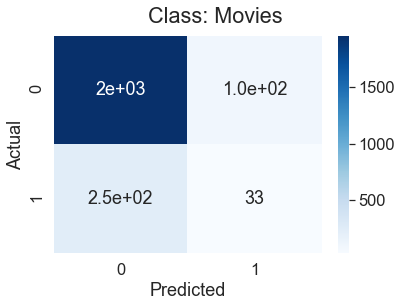

In [720]:
#Confusion Matrix for the "Movies" genre.
cm_for_each_label(y_test[:, 12], y_pred[:, 12], 0.5, "Class: Movies")

#### Best predicted genres: TV shows, Horror, Music and Musicals
#### Worst predicted genres: International movies, Comedy, Drama

## 4.2.4 CNN Model Evaluated with Lemmatized Data 

We notices in Experimental Setup 1 that stemming or lemmatized data had insignificant affect on statistical models. We are now going to determine whether lemmatized data affects the performance of the CNN model.

In [183]:
#tokenization and sequencing preprocessing techniques
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(corpus_lemma)
sequences = tokenizer.texts_to_sequences(corpus_lemma)
x = pad_sequences(sequences, maxlen=200)

In [184]:
#train test split
from sklearn.model_selection import train_test_split
seeds = [1, 43, 678, 90, 135]
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    data[data.columns[1:]], 
                                                    test_size=0.3, 
                                                    random_state=seeds[4])

In [185]:
num_classes = y_train.shape[1]
max_words = len(tokenizer.word_index) + 1
maxlen = 200

In [777]:
#CNN model with lemmatized data
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D

filter_length = 300

cnn_model_lemma = Sequential()
cnn_model_lemma.add(Embedding(max_words, 20, input_length=maxlen))
#model.add(Dropout(0.5))
cnn_model_lemma.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
cnn_model_lemma.add(GlobalMaxPool1D())
cnn_model_lemma.add(Dense(num_classes))
cnn_model_lemma.add(Activation('sigmoid'))

cnn_model_lemma.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

callbacks = [
    ReduceLROnPlateau(),
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)
]

history = cnn_model_lemma.fit(X_train, y_train,
                    class_weight=class_weight,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.3,
                    callbacks=callbacks)

Epoch 1/30
120/120 [==============================] - 3s 18ms/step - loss: 0.5343 - auc_43: 0.5630 - val_loss: 0.3865 - val_auc_43: 0.7244
Epoch 2/30
120/120 [==============================] - 2s 15ms/step - loss: 0.3818 - auc_43: 0.7264 - val_loss: 0.3732 - val_auc_43: 0.7534
Epoch 3/30
120/120 [==============================] - 2s 16ms/step - loss: 0.3529 - auc_43: 0.7858 - val_loss: 0.3459 - val_auc_43: 0.7985
Epoch 4/30
120/120 [==============================] - 2s 16ms/step - loss: 0.3094 - auc_43: 0.8446 - val_loss: 0.3329 - val_auc_43: 0.8178
Epoch 5/30
120/120 [==============================] - 2s 18ms/step - loss: 0.2738 - auc_43: 0.8819 - val_loss: 0.3308 - val_auc_43: 0.8227
Epoch 6/30
120/120 [==============================] - 2s 18ms/step - loss: 0.2414 - auc_43: 0.9144 - val_loss: 0.3369 - val_auc_43: 0.8197
Epoch 7/30
120/120 [==============================] - 2s 17ms/step - loss: 0.2099 - auc_43: 0.9369 - val_loss: 0.3491 - val_auc_43: 0.8142
Epoch 8/30
120/120 [=======

In [778]:
#predicting the accuracy of the model
metrics_cnn_lemma = cnn_model_lemma.evaluate(X_test, y_test)
print("{}: {}".format(model.metrics_names[1], metrics_cnn_lemma[1]))

74/74 [==============================] - 0s 6ms/step - loss: 0.6277 - auc_43: 0.7544
auc_42: 0.7544382810592651


In [779]:
#creating a prediction label to build AUC-ROC curve for the model
y_pred_lemma = cnn_model_lemma.predict(X_test, verbose = 1, batch_size = 32)

74/74 [==============================] - 0s 6ms/step


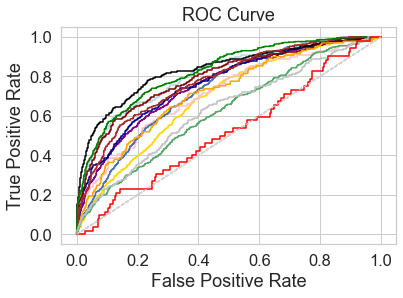

In [780]:
from sklearn.metrics import roc_curve, auc

def plot_roc(y, y_pred_glove, colors):

    fpr, tpr, thresholds = roc_curve(y, y_pred_glove)
  
    plt.plot(fpr, tpr, color=colors, lw = 1.5, label='ROC Curve')
    plt.plot([0, 1], [0, 1], color='lightgrey', lw = 1, linestyle='--')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
plot_roc(y_test[:, 0], y_pred_lemma[:, 0],'gold') #International movies
plot_roc(y_test[:, 1], y_pred_lemma[:, 1],"pink") #'Music & Musicals'
plot_roc(y_test[:, 2], y_pred_lemma[:, 2],"purple") #Comedy
plot_roc(y_test[:, 3], y_pred_lemma[:, 3],"b") #Drama
plot_roc(y_test[:, 4], y_pred_lemma[:, 4],"g") #International TV
plot_roc(y_test[:, 5], y_pred_lemma[:, 5],"lightblue") #Horror
plot_roc(y_test[:, 6], y_pred_lemma[:, 6],"darkblue") #Action and Adventure
plot_roc(y_test[:, 7], y_pred_lemma[:, 7],"black") #Documentary
plot_roc(y_test[:, 8], y_pred_lemma[:, 8],"maroon") #Thriller
plot_roc(y_test[:, 9], y_pred_lemma[:, 9],"orange") #TV show
plot_roc(y_test[:, 10], y_pred_lemma[:, 10],"brown") #Romantic
plot_roc(y_test[:, 11], y_pred_lemma[:, 11],"green") #Kids and Family
plot_roc(y_test[:, 12], y_pred_lemma[:, 12],"silver") #Movies
plot_roc(y_test[:, 13], y_pred_lemma[:, 13],"red") #Others

In [900]:
preprocessing_results.loc[1,'CNN model - Lemmatization'] = cnn_model_lemma.evaluate(X_test, y_test)[1]
preprocessing_results

74/74 [==============================] - 0s 4ms/step - loss: 0.6277 - auc_43: 0.7544


,DNN model - Stemming,CNN model - Stemming,CNN model - Lemmatization,CNN model - GloVe Embeddings
1,0.744513,0.766353,0.754438,NaN


We can conclude from the table that stemming has slightly better effect on the model performance of our multilabel text classification, for both statistical and neural network models.

## 4.2.5 CNN with Glove Word Embeddings (additional experiment)

Lastly, as part of Experimental Setup 2, we use GloVe embeddings to train our CNN model and evaluate how it affects the model performance.

In [782]:
#defining the key words
num_classes = y_train.shape[1] #number of classes
max_words = len(tokenizer.word_index) + 1 #maximum number of words
maxlen = 200 #maximum sentence length
word_index = tokenizer.word_index #word index

In [783]:
#loading the downloaded glove file
glovefile = ('users/harveenkaur/Downloads/glove.840B.300d.txt') 

In [784]:
#load in pre-trained vectors
#loading word vectors by usingpre trained glove txt file
embeddings_dictionary = dict()
f = glovefile
for line in f:
    values = line.split()
    word = values[0] ## The first entry is the word
    coefs = np.asarray(values[1:], dtype='float32') ## These are the vecotrs representing the embedding for the word
    embeddings_dictionary[word] = coefs

print('GloVe data loaded')

GloVe data loaded


In [795]:
#loading the required keras libraries
#preparing the embedding matrix

from keras.layers import Embedding
from keras.initializers import Constant

## EMBEDDING_DIM =  ## seems to need to match the embeddings_index dimension
EMBEDDING_DIM = 100
num_words = min(max_words, len(word_index) + 1)
embedding_matrix = np.zeros((max_words, 100))
for word, i in word_index.items():
    if i > max_words:
        embedding_vector = embeddings_index.get(word) ## This references the loaded embeddings dictionary
        if embedding_vector is not None:
         # words not found in embedding index will be all-zeros.
         embedding_matrix[i] = embedding_vector

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                             EMBEDDING_DIM,
                             weights=[embedding_matrix],
                             input_length=maxlen,
                             trainable=False)

In [796]:
count_data['class_weight'] = len(count_data) / count_data['count']
class_weight = {}
for index, label in enumerate(categories):
    count_data[index] = count_data[count_data['category'] == categories]['class_weight'].values[0]
    
count_data.head()

,category,count,class_weight,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Drama,2810,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982
1,International Movies,2437,0.005745,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982
2,Comedy,2344,0.005973,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982
3,Kids and Family,1372,0.010204,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982
4,International TV,1239,0.011299,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982,0.004982


In [786]:
#performing CNN model with GloVe word embeddings
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D

filter_length = 300

model = Sequential()
model.add(Embedding(max_words, 100, weights=[embedding_matrix], trainable=False))
#model.add(Dropout(0.5))
model.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPool1D())
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

callbacks = [
    ReduceLROnPlateau(),
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)
]

history = model.fit(X_train, y_train,
                    class_weight=class_weight,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.3,
                    callbacks=callbacks)

Epoch 1/30
120/120 [==============================] - 4s 27ms/step - loss: 0.6831 - auc_44: 0.5112 - val_loss: 0.6546 - val_auc_44: 0.6502
Epoch 2/30
120/120 [==============================] - 3s 25ms/step - loss: 0.6454 - auc_44: 0.5872 - val_loss: 0.6208 - val_auc_44: 0.6930
Epoch 3/30
120/120 [==============================] - 4s 29ms/step - loss: 0.6122 - auc_44: 0.6390 - val_loss: 0.5912 - val_auc_44: 0.6933
Epoch 4/30
120/120 [==============================] - 3s 29ms/step - loss: 0.5835 - auc_44: 0.6591 - val_loss: 0.5653 - val_auc_44: 0.7018
Epoch 5/30
120/120 [==============================] - 3s 28ms/step - loss: 0.5587 - auc_44: 0.6737 - val_loss: 0.5427 - val_auc_44: 0.7098
Epoch 6/30
120/120 [==============================] - 3s 28ms/step - loss: 0.5359 - auc_44: 0.6836 - val_loss: 0.5229 - val_auc_44: 0.7053
Epoch 7/30
120/120 [==============================] - 4s 29ms/step - loss: 0.5166 - auc_44: 0.6931 - val_loss: 0.5058 - val_auc_44: 0.7109
Epoch 8/30
120/120 [=======

In [787]:
#determining the accuracy
metrics = model.evaluate(X_test, y_test)
print("{}: {}".format(model.metrics_names[1], metrics[1]))

74/74 [==============================] - 1s 12ms/step - loss: 0.3918 - auc_44: 0.7136
auc_44: 0.7135522365570068


In [788]:
#testing loss, accuracy
model.evaluate(X_test, y_test, verbose=0)

[0.39178505539894104, 0.7135522365570068]

In [901]:
preprocessing_results.loc[1,'CNN model - GloVe Embeddings'] = model.evaluate(X_test, y_test)[1]
preprocessing_results

74/74 [==============================] - 1s 7ms/step - loss: 0.3918 - auc_44: 0.7136


,DNN model - Stemming,CNN model - Stemming,CNN model - Lemmatization,CNN model - GloVe Embeddings
1,0.744513,0.766353,0.754438,0.713552


To conclude Experimental Setup 2, we trained two neural network models: DNN and CNN. CNN performed slightly better than DNN on our netflix movie genre prediction problem. Data preprocessing steps like stemming gave slightly better performance over lemmatization techniques. CNN model trained with GloVe word embeddings hampered the accuracy of the CNN model significantly.

# 5. Experimental Setup 3 - Use of Different Optimizer for CNN

SGD is a variant of gradient descent. Instead of performing computations on the whole dataset — which is redundant and inefficient — SGD only computes on a small subset or random selection of data examples. SGD produces the same performance as regular gradient descent when the learning rate is low.
Adam is an algorithm for gradient-based optimization of stochastic objective functions. It combines the advantages of two SGD extensions — Root Mean Square Propagation (RMSProp) and Adaptive Gradient Algorithm (AdaGrad) — and computes individual adaptive learning rates for different parameters.

As part of the Experimental Setup 3, we use a different optimsiser called Stochastic Gradient Descent and evaluate how it affects our model performance. CNN performance with CNN has already been tested in section 4.2.2.

In [683]:
#Fitting a CNN model with the optimser - Stochastic Gradient Descent

from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D
import keras
from keras.optimizers import SGD

filter_length = 300

cnn_model_sgd = Sequential()
cnn_model_sgd.add(Embedding(max_words, 100, input_length=maxlen))
#model.add(Dropout(0.5))
cnn_model_sgd.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
cnn_model_sgd.add(GlobalMaxPool1D())
cnn_model_sgd.add(Dense(num_classes))
cnn_model_sgd.add(Activation('sigmoid'))

opt = SGD(lr=0.01, momentum=0.9)
cnn_model_sgd.compile(optimizer=opt, loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

callbacks = [
    ReduceLROnPlateau(),
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)
]

history = cnn_model_sgd.fit(X_train, y_train,
                    class_weight=class_weight,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.3,
                    callbacks=callbacks)

Epoch 1/30
120/120 [==============================] - 5s 35ms/step - loss: 0.0034 - auc_37: 0.5272 - val_loss: 0.6912 - val_auc_37: 0.5234
Epoch 2/30
120/120 [==============================] - 4s 34ms/step - loss: 0.0034 - auc_37: 0.5276 - val_loss: 0.6894 - val_auc_37: 0.5297
Epoch 3/30
120/120 [==============================] - 4s 33ms/step - loss: 0.0034 - auc_37: 0.5378 - val_loss: 0.6875 - val_auc_37: 0.5337
Epoch 4/30
120/120 [==============================] - 4s 34ms/step - loss: 0.0034 - auc_37: 0.5401 - val_loss: 0.6857 - val_auc_37: 0.5415
Epoch 5/30
120/120 [==============================] - 5s 38ms/step - loss: 0.0034 - auc_37: 0.5483 - val_loss: 0.6838 - val_auc_37: 0.5484
Epoch 6/30
120/120 [==============================] - 4s 37ms/step - loss: 0.0034 - auc_37: 0.5596 - val_loss: 0.6820 - val_auc_37: 0.5518
Epoch 7/30
120/120 [==============================] - 4s 33ms/step - loss: 0.0034 - auc_37: 0.5501 - val_loss: 0.6802 - val_auc_37: 0.5580
Epoch 8/30
120/120 [=======

In [689]:
#determining the accuracy of the model
metrics = cnn_model_sgd.evaluate(X_test, y_test)
print("{}: {}".format(model.metrics_names[1], metrics[1]))

74/74 [==============================] - 1s 7ms/step - loss: 0.6419 - auc_37: 0.6769
auc_33: 0.6768866181373596


In [685]:
#testing loss, accuracy
cnn_model_sgd.evaluate(X_test, y_test, verbose=0)

[0.641873836517334, 0.6768866181373596]

In [686]:
#creating a label for AUC-ROC curve
y_pred_sgd = cnn_model_sgd.predict(X_test, verbose = 1, batch_size = 32)

74/74 [==============================] - 1s 7ms/step


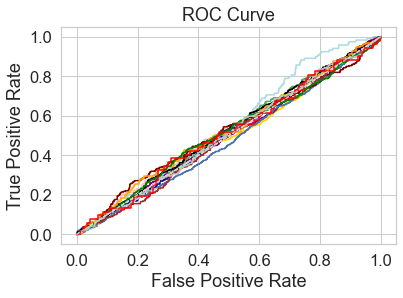

In [687]:
#Plotting the AUC-ROC curves for each genre

from sklearn.metrics import roc_curve, auc

def plot_roc(y, y_pred_sgd, colors):

    fpr, tpr, thresholds = roc_curve(y, y_pred_sgd)
  
    plt.plot(fpr, tpr, color=colors, lw = 1.5, label='ROC Curve')
    plt.plot([0, 1], [0, 1], color='lightgrey', lw = 1, linestyle='--')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
plot_roc(y_test[:, 0], y_pred_sgd[:, 0],'gold') #International movies
plot_roc(y_test[:, 1], y_pred_sgd[:, 1],"pink") #'Music & Musicals'
plot_roc(y_test[:, 2], y_pred_sgd[:, 2],"purple") #Comedy
plot_roc(y_test[:, 3], y_pred_sgd[:, 3],"b") #Drama
plot_roc(y_test[:, 4], y_pred_sgd[:, 4],"g") #International TV
plot_roc(y_test[:, 5], y_pred_sgd[:, 5],"lightblue") #Horror
plot_roc(y_test[:, 6], y_pred_sgd[:, 6],"darkblue") #Action and Adventure
plot_roc(y_test[:, 7], y_pred_sgd[:, 7],"black") #Documentary
plot_roc(y_test[:, 8], y_pred_sgd[:, 8],"maroon") #Thriller
plot_roc(y_test[:, 9], y_pred_sgd[:, 9],"orange") #TV show
plot_roc(y_test[:, 10], y_pred_sgd[:, 10],"brown") #Romantic
plot_roc(y_test[:, 11], y_pred_sgd[:, 11],"green") #Kids and Family
plot_roc(y_test[:, 12], y_pred_sgd[:, 12],"silver") #Movies
plot_roc(y_test[:, 13], y_pred_sgd[:, 13],"red") #Others

It is very evident from the graph that the SGD optimizer has a negative impact on the CNN model performance. Some genres show very poor performance, worse than even a coin flip such as Drama.

In [811]:
columns_optimizers = []
optimizers_results = pd.DataFrame(columns = columns_optimizers)


optimizers_results.loc[1,'CNN model - Adam'] = cnn_model.evaluate(X_test, y_test, verbose=0)[1]

optimizers_results.loc[1,'CNN model - SGD'] = cnn_model_sgd.evaluate(X_test, y_test, verbose=0)[1]

optimizers_results

,CNN model - Adam,CNN model - SGD
1,0.766353,0.676887


To conclude Experimental Setup 3, the CNN model performs significantly better in predicting movie genres with the Adam classifier over the SGD classifier. 

# 6. Experimental Setup 4 - Different number of cycles

An epoch means training the neural network with all the training data for one cycle. The number of epoch will decide- how many times we will change the weights of the network. As the number of epochs increases, the same number of times weights are changed in the neural network and the boundary goes from underfitting to optimal to overfitting. We need to find an optimal value for epoch to observe best model performance.

As part of the last experimental setup, I have experimented with different number of epochs: 5, 10, 20, 35, 30 (original) and 40.

#### CNN with 5 epochs

In [272]:
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D

filter_length = 300

cnn_model_5 = Sequential()
cnn_model_5.add(Embedding(max_words, 20, input_length=maxlen))
#model.add(Dropout(0.5))
cnn_model_5.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
cnn_model_5.add(GlobalMaxPool1D())
cnn_model_5.add(Dense(num_classes))
cnn_model_5.add(Activation('sigmoid'))

cnn_model_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

callbacks = [
    ReduceLROnPlateau(),
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)
]

history = cnn_model_5.fit(X_train, y_train,
                    class_weight=class_weight,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.3,
                    callbacks=callbacks)

Epoch 1/5
120/120 [==============================] - 4s 26ms/step - loss: 0.0028 - auc_20: 0.5693 - val_loss: 0.3880 - val_auc_20: 0.7182
Epoch 2/5
120/120 [==============================] - 2s 14ms/step - loss: 0.0019 - auc_20: 0.7158 - val_loss: 0.3867 - val_auc_20: 0.7211
Epoch 3/5
120/120 [==============================] - 2s 15ms/step - loss: 0.0019 - auc_20: 0.7354 - val_loss: 0.3718 - val_auc_20: 0.7575
Epoch 4/5
120/120 [==============================] - 2s 16ms/step - loss: 0.0018 - auc_20: 0.7692 - val_loss: 0.3543 - val_auc_20: 0.7840
Epoch 5/5
120/120 [==============================] - 2s 16ms/step - loss: 0.0016 - auc_20: 0.8122 - val_loss: 0.3399 - val_auc_20: 0.8067


In [273]:
#determining the accuracy
metrics = cnn_model_5.evaluate(X_test, y_test)
print("{}: {}".format(model.metrics_names[1], metrics[1]))

74/74 [==============================] - 0s 3ms/step - loss: 0.3374 - auc_20: 0.8079
auc_15: 0.8078826665878296


#### CNN with 10 epochs

In [274]:
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D

filter_length = 300

cnn_model_10 = Sequential()
cnn_model_10.add(Embedding(max_words, 20, input_length=maxlen))
#model.add(Dropout(0.5))
cnn_model_10.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
cnn_model_10.add(GlobalMaxPool1D())
cnn_model_10.add(Dense(num_classes))
cnn_model_10.add(Activation('sigmoid'))

cnn_model_10.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

callbacks = [
    ReduceLROnPlateau(),
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)
]

history = cnn_model_10.fit(X_train, y_train,
                    class_weight=class_weight,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.3,
                    callbacks=callbacks)

Epoch 1/10
120/120 [==============================] - 3s 18ms/step - loss: 0.0028 - auc_21: 0.5564 - val_loss: 0.3880 - val_auc_21: 0.7182
Epoch 2/10
120/120 [==============================] - 2s 15ms/step - loss: 0.0019 - auc_21: 0.7200 - val_loss: 0.3857 - val_auc_21: 0.7266
Epoch 3/10
120/120 [==============================] - 2s 17ms/step - loss: 0.0019 - auc_21: 0.7306 - val_loss: 0.3710 - val_auc_21: 0.7573
Epoch 4/10
120/120 [==============================] - 2s 18ms/step - loss: 0.0018 - auc_21: 0.7844 - val_loss: 0.3532 - val_auc_21: 0.7857
Epoch 5/10
120/120 [==============================] - 2s 18ms/step - loss: 0.0016 - auc_21: 0.8202 - val_loss: 0.3385 - val_auc_21: 0.8078
Epoch 6/10
120/120 [==============================] - 2s 17ms/step - loss: 0.0015 - auc_21: 0.8610 - val_loss: 0.3316 - val_auc_21: 0.8182
Epoch 7/10
120/120 [==============================] - 2s 16ms/step - loss: 0.0013 - auc_21: 0.8941 - val_loss: 0.3331 - val_auc_21: 0.8217
Epoch 8/10
120/120 [=======

In [275]:
#determining the accuracy
metrics = cnn_model_10.evaluate(X_test, y_test)
print("{}: {}".format(model.metrics_names[1], metrics[1]))

74/74 [==============================] - 0s 4ms/step - loss: 0.3568 - auc_21: 0.8168
auc_15: 0.8168230652809143


#### CNN with 20 epochs

In [276]:
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D

filter_length = 300

cnn_model_20 = Sequential()
cnn_model_20.add(Embedding(max_words, 20, input_length=maxlen))
#model.add(Dropout(0.5))
cnn_model_20.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
cnn_model_20.add(GlobalMaxPool1D())
cnn_model_20.add(Dense(num_classes))
cnn_model_20.add(Activation('sigmoid'))

cnn_model_20.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

callbacks = [
    ReduceLROnPlateau(),
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)
]

history = cnn_model_20.fit(X_train, y_train,
                    class_weight=class_weight,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.3,
                    callbacks=callbacks)

Epoch 1/20
120/120 [==============================] - 3s 18ms/step - loss: 0.0028 - auc_22: 0.5656 - val_loss: 0.3875 - val_auc_22: 0.7205
Epoch 2/20
120/120 [==============================] - 2s 17ms/step - loss: 0.0019 - auc_22: 0.7197 - val_loss: 0.3873 - val_auc_22: 0.7274
Epoch 3/20
120/120 [==============================] - 2s 16ms/step - loss: 0.0019 - auc_22: 0.7361 - val_loss: 0.3704 - val_auc_22: 0.7634
Epoch 4/20
120/120 [==============================] - 2s 18ms/step - loss: 0.0018 - auc_22: 0.7745 - val_loss: 0.3490 - val_auc_22: 0.7939
Epoch 5/20
120/120 [==============================] - 2s 18ms/step - loss: 0.0016 - auc_22: 0.8214 - val_loss: 0.3349 - val_auc_22: 0.8142
Epoch 6/20
120/120 [==============================] - 2s 19ms/step - loss: 0.0015 - auc_22: 0.8632 - val_loss: 0.3288 - val_auc_22: 0.8240
Epoch 7/20
120/120 [==============================] - 2s 18ms/step - loss: 0.0013 - auc_22: 0.8909 - val_loss: 0.3307 - val_auc_22: 0.8240
Epoch 8/20
120/120 [=======

In [277]:
#determining the accuracy
metrics = cnn_model_20.evaluate(X_test, y_test)
print("{}: {}".format(model.metrics_names[1], metrics[1]))

74/74 [==============================] - 0s 3ms/step - loss: 0.5175 - auc_22: 0.7729
auc_15: 0.7729296684265137


#### CNN with 25 epochs

In [280]:
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D

filter_length = 300

cnn_model_25 = Sequential()
cnn_model_25.add(Embedding(max_words, 20, input_length=maxlen))
#model.add(Dropout(0.5))
cnn_model_25.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
cnn_model_25.add(GlobalMaxPool1D())
cnn_model_25.add(Dense(num_classes))
cnn_model_25.add(Activation('sigmoid'))

cnn_model_25.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

callbacks = [
    ReduceLROnPlateau(),
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)
]

history = cnn_model_25.fit(X_train, y_train,
                    class_weight=class_weight,
                    epochs=25,
                    batch_size=32,
                    validation_split=0.3,
                    callbacks=callbacks)

Epoch 1/25
120/120 [==============================] - 3s 18ms/step - loss: 0.0028 - auc_24: 0.5513 - val_loss: 0.3876 - val_auc_24: 0.7199
Epoch 2/25
120/120 [==============================] - 2s 17ms/step - loss: 0.0019 - auc_24: 0.7232 - val_loss: 0.3842 - val_auc_24: 0.7321
Epoch 3/25
120/120 [==============================] - 2s 18ms/step - loss: 0.0019 - auc_24: 0.7359 - val_loss: 0.3682 - val_auc_24: 0.7628
Epoch 4/25
120/120 [==============================] - 2s 18ms/step - loss: 0.0018 - auc_24: 0.7768 - val_loss: 0.3519 - val_auc_24: 0.7884
Epoch 5/25
120/120 [==============================] - 2s 18ms/step - loss: 0.0016 - auc_24: 0.8182 - val_loss: 0.3401 - val_auc_24: 0.8058
Epoch 6/25
120/120 [==============================] - 2s 18ms/step - loss: 0.0015 - auc_24: 0.8516 - val_loss: 0.3363 - val_auc_24: 0.8112
Epoch 7/25
120/120 [==============================] - 2s 18ms/step - loss: 0.0014 - auc_24: 0.8784 - val_loss: 0.3378 - val_auc_24: 0.8120
Epoch 8/25
120/120 [=======

In [281]:
#determining the accuracy
metrics = cnn_model_25.evaluate(X_test, y_test)
print("{}: {}".format(model.metrics_names[1], metrics[1]))

74/74 [==============================] - 0s 4ms/step - loss: 0.5358 - auc_24: 0.7692
auc_15: 0.769217312335968


#### CNN with 40 epochs

In [816]:
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D

filter_length = 300

cnn_model_40 = Sequential()
cnn_model_40.add(Embedding(max_words, 20, input_length=maxlen))
#model.add(Dropout(0.5))
cnn_model_40.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
cnn_model_40.add(GlobalMaxPool1D())
cnn_model_40.add(Dense(num_classes))
cnn_model_40.add(Activation('sigmoid'))

cnn_model_40.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

callbacks = [
    ReduceLROnPlateau(),
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)
]

history = cnn_model_40.fit(X_train, y_train,
                    class_weight=class_weight,
                    epochs=40,
                    batch_size=32,
                    validation_split=0.3,
                    callbacks=callbacks)

Epoch 1/40
120/120 [==============================] - 3s 18ms/step - loss: 0.5455 - auc_45: 0.5399 - val_loss: 0.3865 - val_auc_45: 0.7247
Epoch 2/40
120/120 [==============================] - 2s 16ms/step - loss: 0.3750 - auc_45: 0.7394 - val_loss: 0.3684 - val_auc_45: 0.7667
Epoch 3/40
120/120 [==============================] - 2s 18ms/step - loss: 0.3513 - auc_45: 0.7885 - val_loss: 0.3436 - val_auc_45: 0.8011
Epoch 4/40
120/120 [==============================] - 2s 17ms/step - loss: 0.3081 - auc_45: 0.8456 - val_loss: 0.3298 - val_auc_45: 0.8228
Epoch 5/40
120/120 [==============================] - 2s 16ms/step - loss: 0.2710 - auc_45: 0.8875 - val_loss: 0.3299 - val_auc_45: 0.8246
Epoch 6/40
120/120 [==============================] - 2s 16ms/step - loss: 0.2403 - auc_45: 0.9150 - val_loss: 0.3379 - val_auc_45: 0.8212
Epoch 7/40
120/120 [==============================] - 2s 17ms/step - loss: 0.2092 - auc_45: 0.9380 - val_loss: 0.3482 - val_auc_45: 0.8149
Epoch 8/40
120/120 [=======

In [817]:
#determining the accuracy
metrics = cnn_model_40.evaluate(X_test, y_test)
print("{}: {}".format(model.metrics_names[1], metrics[1]))

74/74 [==============================] - 0s 3ms/step - loss: 0.6208 - auc_45: 0.7529
auc_44: 0.7529198527336121


In [818]:
#Testing Loss, Accuracy
cnn_model_40.evaluate(X_test, y_test, verbose=0)

[0.6207721829414368, 0.7529198527336121]

In [902]:
columns_epochs = []
epochs_results = pd.DataFrame(columns = columns_epochs)


epochs_results.loc[1,'CNN model - 5 epochs'] = cnn_model_5.evaluate(X_test, y_test, verbose=0)[1]

epochs_results.loc[1,'CNN model - 10 epochs'] = cnn_model_10.evaluate(X_test, y_test, verbose=0)[1]

epochs_results.loc[1,'CNN model - 20 epochs'] = cnn_model_20.evaluate(X_test, y_test, verbose=0)[1]

epochs_results.loc[1,'CNN model - 25 epochs'] = cnn_model_25.evaluate(X_test, y_test, verbose=0)[1]

epochs_results.loc[1,'CNN model - 30 epochs'] = cnn_model.evaluate(X_test, y_test, verbose=0)[1]

epochs_results.loc[1,'CNN model - 40 epochs'] = cnn_model_40.evaluate(X_test, y_test, verbose=0)[1]

epochs_results

,CNN model - 5 epochs,CNN model - 10 epochs,CNN model - 20 epochs,CNN model - 25 epochs,CNN model - 30 epochs,CNN model - 40 epochs
1,0.807883,0.816823,0.77293,0.769217,0.766353,0.75292


Clearly, number of epochs significantly affect the model performance of CNN. CNN model trained with 10 epochs give the best model performance with an accuracy of approx 82%. After 20 epochs, the model performance starts declining as observed in the table above.

# 7. Conclusion

Q) Discuss best results and mention if there was any need to adjust and retrain during the experimentation (4 marks), evaluate the overall attempt and outcome – is the original problem solved? (4 marks)

A) Among all the models tested and evaluated i.e. Logistic Regression, Naive Bayes, DNN and CNN, the best model performance was achieved using the CNN model with an accuracy of approx. 77%. This was using the Adam optimizer. SGD optmizer worsened the performance of the model. Model trained with stemming data preprocessing technique gave slightly better performance than the one trained on lemmatized data or with glove embeddings. Furthermore, the performance of the model was quite significantly improved to 82% by setting the number of epochs to 10. Thus, the best model accuracy achieved was 82% using the CNN model trained on data preprocessed with stemming, with the Adam optimizer and 10 number of epochs.

Both the Naive Bayes and Logistic Regression models performed significantly better than the neural network models in terms of test accuracies achieving a highest accuracy of 87%. However, the AUC-ROC curve values for each category gave very poor results with values just slightly above 0.5 for most classes in both the models. Therefore, statistical methods failed to solve the netflix multilabel text classification problem.

Retraining any of the models gave more or less quite the same results with similar accuracies. 

The original problem to predict the movie genre categories from the description problem was solved to an extent using the statistical and neural network models. We achieved the best accuracy of approx 82%(on the main CNN model which was extensively experimented for this assignment), with certain genres getting predicted exceedingly well with over 90% accuracies like TV shows, Horror, Music and Musicals. Certain genres like International movies, comedy and drama performed relatively poorly with around 70% accuracies. Other genres had an accuracy in the range of 80-90%. Furthermore, improvements could be made in choosing the batch size, another word embeddings dictionary choice, loss functions, one hot encoding methods etc to improve the accuracy of the model. For the purpose of the assignment, the research was limited to these 4 setups. 

Also, as we observe in figure 1, the top 3 categories - Drama, International movies and Comedy have been predicted with least accuracies and the bottom 3 categories - TV show, Music and Musicals and Horror have been predicted with the highest accuracies. The middle ones fall in the middle range of accuracies as well. This shows that feature extraction for categories with least count was easier than categories with higher counts as higher count categories don't have clear boundaries which make feature extraction and thus classification difficult and vice versa. 

To conclude, we were able to solve the netflix dataset multilabel text classification with the CNN model with data pre-processed with stemming, using an Adam optimizer and 10 number of epochs - achieving an accuracy of 82%.